https://adgefficiency.com/dqn-tuning/

In [3]:
import gym
from ddqn import DDQN
import torch
import variable as v
from train_session import TrainSession
from copy import deepcopy
import numpy as np
import utils
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
env = gym.make("Breakout-v0")
train_session = None

In [5]:
env.reset()

action_shape = env.action_space.n
state_shape = env.observation_space.shape[0]
input_as_image = True
load_agent = False
seed = 5625

<Figure size 432x288 with 0 Axes>

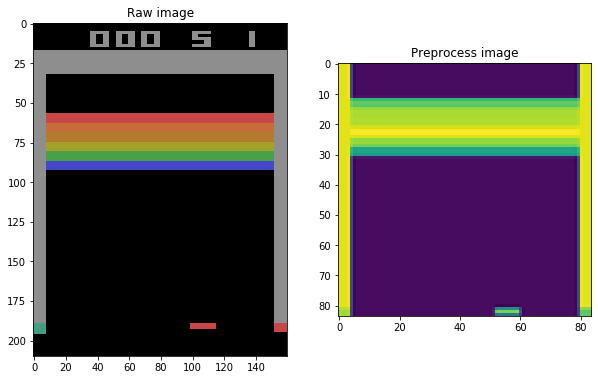

In [6]:
s = env.reset()
plt.figure()
f, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(s)
ax[1].imshow(np.squeeze(DDQN.preprocess_image(s), axis=0))
ax[0].title.set_text('Raw image')
ax[1].title.set_text('Preprocess image')

In [7]:
input_volume = DDQN.preprocess_image(env.reset()).shape[1]

In [8]:
q_network_init = {
    'cl1_channels': 1, 'cl1_kernel_size': 16, 'cl1_stride': 4, 'cl1_padding': 0,
    'cl2_channels': 4, 'cl2_kernel_size': 8, 'cl2_stride': 1, 'cl2_padding': 0,
    'out_channels': 8,
    'l1_shape': None, 'l2_shape': 256,'l3_shape': 32, 'o_shape': action_shape
}
cl2_volume = utils.get_conv_output_volume(input_volume, q_network_init["cl1_kernel_size"], 
    q_network_init["cl1_padding"], q_network_init["cl1_stride"])
o_volume = utils.get_conv_output_volume(cl2_volume, q_network_init["cl2_kernel_size"], 
    q_network_init["cl2_padding"], q_network_init["cl2_stride"])

q_network_init['l1_shape'] = (o_volume**2)*q_network_init["out_channels"] 

In [9]:
q_network_init['l1_shape']

968

In [10]:
replay_buffer_init = {'max_len': 10000, 'batch_size': 256}

exploration_rate = {'rate': 1.0, 'max_rate': 1.0, 'min_rate': 1e-3, 
                    'decay_rate': 1e-5, 'is_constant': False}

ddqn_init = {
    'seed': seed,
    'num_action': action_shape,
    'discount_factor': .99,
    'update_target_rate': .99,
    'update_after': 128,
    'update_every': 256,
    'hard_update_target_every': 7500,
    'policy_type': 'e-greedy',
    'temperature': .5,
    'input_image': input_as_image,
    'num_action': action_shape,
    'q_network': {'network_init': q_network_init, 'optimizer': {'lr': 0.001}, 'input_image': input_as_image},
    'buffer': replay_buffer_init,
    'exploration_rate': exploration_rate
}


In [11]:
if not train_session:
    print('Train Session reset')
    train_session = TrainSession({}, env, seed)

Train Session reset


In [12]:
if True:
    agents_created = {
        'DDQN_agent': DDQN(ddqn_init)
    }
    agent_names = train_session.append_agents(agents_created)
    if load_agent:
        train_session.load_model('DDQN_agent', suffix="Cartpole_500000_ep")
else:
    d = {('temperature', ): [.5, 1.0]}
    agent_names = train_session.parameter_grid_append(DDQN, ddqn_init, d)
    

In [13]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agent(s): \n- {s}")

All Agent(s): 
- DDQN_agent


In [24]:
n_episode = 280
t_max_per_episode = np.inf
graphical = False

In [25]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode,
                    graphical=graphical, agent_subset=all_agent_names)




  0%|          | 0/280 [00:00<?, ?it/s]


  0%|          | 1/280 [00:38<3:01:10, 38.96s/it]


  1%|          | 2/280 [01:17<2:59:37, 38.77s/it]


  1%|          | 3/280 [01:53<2:56:06, 38.15s/it]


  1%|▏         | 4/280 [02:30<2:53:08, 37.64s/it]

KeyboardInterrupt: 

In [ ]:
train_session.plot_train(window=10, agent_subset=agent_names)

In [18]:
n_episode_test = 1
graphical_test = True

In [22]:
train_session.test(n_episode=n_episode_test, t_max_per_episode=t_max_per_episode, 
                   graphical=graphical_test, agent_subset=None, plot=True,
                   window=1, save_video=False)



  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [23]:
env.close()

In [66]:
train_session.save_model(suffix='Cartpole_500000_ep')